# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 1.1 Reading Data

In [2]:
#50k datapoints considered
project_data = pd.read_csv('train_data.csv', nrows=50000)
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
project_data['project_submitted_datetime'][:3]

0    2016-12-05 13:43:57
1    2016-10-25 09:22:10
2    2016-08-31 12:03:56
Name: project_submitted_datetime, dtype: object

In [5]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Grades PreK-2,Applied Learning,Early Development,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,We need a classroom rug that we can use as a c...,"Benjamin Franklin once said, \""Tell me and I f...",My students need flexible seating in the class...,2,1
41558,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,Grades 3-5,Literacy & Language,Literacy,Going Deep: The Art of Inner Thinking!,"My students crave challenge, they eat obstacle...","We are an urban, public k-5 elementary school....",With the new common core standards that have b...,These remarkable gifts will provide students w...,My students need copies of the New York Times ...,2,1


In [6]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [7]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

## 1.2 preprocessing of `project_subject_categories`

In [8]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [9]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [10]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [11]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,essay
0,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Grades PreK-2,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,We need a classroom rug that we can use as a c...,"Benjamin Franklin once said, \""Tell me and I f...",My students need flexible seating in the class...,2,1,481.04,9,AppliedLearning,EarlyDevelopment,I recently read an article about giving studen...
1,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,Grades 3-5,Going Deep: The Art of Inner Thinking!,"My students crave challenge, they eat obstacle...","We are an urban, public k-5 elementary school....",With the new common core standards that have b...,These remarkable gifts will provide students w...,My students need copies of the New York Times ...,2,1,17.74,14,Literacy_Language,Literacy,"My students crave challenge, they eat obstacle..."


In [12]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [13]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)

I recently read an article about giving students a choice about how they learn. We already set goals; why not let them choose where to sit, and give them options of what to sit on?I teach at a low-income (Title 1) school. Every year, I have a class with a range of abilities, yet they are all the same age. They learn differently, and they have different interests. Some have ADHD, and some are fast learners. Yet they are eager and active learners that want and need to be able to move around the room, yet have a place that they can be comfortable to complete their work.We need a classroom rug that we can use as a class for reading time, and students can use during other learning times. I have also requested four Kore Kids wobble chairs and four Back Jack padded portable chairs so that students can still move during whole group lessons without disrupting the class. Having these areas will provide these little ones with a way to wiggle while working.Benjamin Franklin once said, \"Tell me an

In [14]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [15]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

I teach at a Title 1 school, with 73% of my students who receive free/reduced lunch. Our school provides free breakfast for all students. I am a Special Education certified teacher and I teach Kindergarten in a general education setting with my class that consists 52% students with special needs. The disabilities include Autism Spectrum Disorder, Speech Impaired, Language Impaired, Other Health Impaired (ADHD), and Developmentally Delayed. I also have about 42% of my students who are English Language Learners.\r\n\r\n\"Self-motivated learners\" is a synonym of \"my students\".  They love to learn and they possess a positive outlook and attitude in school. Almost everyday, my students would ask me, \"Ms. Perez, what are we going to learn today?\" I could not ask for a better greeting from my students.This project will greatly impact my students’ learning on a daily basis. The wobble chairs will provide assistance for my students who have difficulties focusing and attending during lesson

In [16]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

I teach at a Title 1 school, with 73% of my students who receive free/reduced lunch. Our school provides free breakfast for all students. I am a Special Education certified teacher and I teach Kindergarten in a general education setting with my class that consists 52% students with special needs. The disabilities include Autism Spectrum Disorder, Speech Impaired, Language Impaired, Other Health Impaired (ADHD), and Developmentally Delayed. I also have about 42% of my students who are English Language Learners.     Self-motivated learners  is a synonym of  my students .  They love to learn and they possess a positive outlook and attitude in school. Almost everyday, my students would ask me,  Ms. Perez, what are we going to learn today?  I could not ask for a better greeting from my students.This project will greatly impact my students’ learning on a daily basis. The wobble chairs will provide assistance for my students who have difficulties focusing and attending during lessons and disc

In [17]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

I teach at a Title 1 school with 73 of my students who receive free reduced lunch Our school provides free breakfast for all students I am a Special Education certified teacher and I teach Kindergarten in a general education setting with my class that consists 52 students with special needs The disabilities include Autism Spectrum Disorder Speech Impaired Language Impaired Other Health Impaired ADHD and Developmentally Delayed I also have about 42 of my students who are English Language Learners Self motivated learners is a synonym of my students They love to learn and they possess a positive outlook and attitude in school Almost everyday my students would ask me Ms Perez what are we going to learn today I could not ask for a better greeting from my students This project will greatly impact my students learning on a daily basis The wobble chairs will provide assistance for my students who have difficulties focusing and attending during lessons and discussions Despite the fact that stud

In [18]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [19]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:42<00:00, 308.51it/s]


In [20]:
# after preprocesing
preprocessed_essays[20000]

'teach title 1 school 73 students receive free reduced lunch school provides free breakfast students special education certified teacher teach kindergarten general education setting class consists 52 students special needs disabilities include autism spectrum disorder speech impaired language impaired health impaired adhd developmentally delayed also 42 students english language learners self motivated learners synonym students love learn possess positive outlook attitude school almost everyday students would ask ms perez going learn today could not ask better greeting students project greatly impact students learning daily basis wobble chairs provide assistance students difficulties focusing attending lessons discussions despite fact students participate physical activities p e recess gonoodle dance videos sessions classroom students still energy stand wiggle seats lessons due special needs beyond students control lot distraction student learning not really achieved full potential lac

In [21]:
#Adding processed columns at place of original columns
project_data['clean_essay'] = preprocessed_essays
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [22]:
#Combining all the above statemennts 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:08<00:00, 5893.65it/s]


In [23]:
# after preprocesing
print(preprocessed_titles[50])
print("="*50)
print(preprocessed_titles[500])
print("="*50)
print(preprocessed_titles[5000])
print("="*50)

building confident reader 04 21 16
stem in the primary classroom
motivating rewarding leaders


In [24]:
project_data['clean_title'] = preprocessed_titles

In [25]:
#replacing 3 nan values with "Mrs." since it was the most common one.
project_data['teacher_prefix'].replace(np.nan,'Mrs.',inplace=True)

<h3><font color='red'>1.3.3 Project grade category Text</font></h3>

In [26]:
#Combining all the above statemennts 
from tqdm import tqdm
preprocessed_grade = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_grade_category'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = sent.replace(" ","_")
    preprocessed_grade.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:03<00:00, 12745.29it/s]


In [27]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
ct1 = Counter()
for word in preprocessed_grade:
    ct1.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
grade_dict = dict(ct1)
sorted_grade_dict = dict(sorted(grade_dict.items(), key=lambda kv: kv[1]))

In [28]:
preprocessed_grade[:3]

['grades_prek_2', 'grades_3_5', 'grades_3_5']

In [29]:
project_data[:3]

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,essay,clean_essay,clean_title
0,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Grades PreK-2,Flexible Seating for Flexible Learning,My students need flexible seating in the class...,2,1,481.04,9,AppliedLearning,EarlyDevelopment,I recently read an article about giving studen...,recently read article giving students choice l...,flexible seating flexible learning
1,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,Grades 3-5,Going Deep: The Art of Inner Thinking!,My students need copies of the New York Times ...,2,1,17.74,14,Literacy_Language,Literacy,"My students crave challenge, they eat obstacle...",students crave challenge eat obstacles breakfa...,going deep the art inner thinking
2,146723,p099708,c0a28c79fe8ad5810da49de47b3fb491,Mrs.,CA,2016-04-27 01:10:09,Grades 3-5,Breakout Box to Ignite Engagement!,"My students need items from a \""Breakout Box\""...",6,1,102.50,11,Math_Science History_Civics,Mathematics SocialSciences,It's the end of the school year. Routines have...,end school year routines run course students n...,breakout box ignite engagement


## 1.5 Preparing data for models

In [30]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories', 'essay',
       'clean_essay', 'clean_title'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

<h1>2. K Nearest Neighbor</h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [91]:
y = project_data['project_is_approved']
type(y)

pandas.core.series.Series

In [92]:
X = project_data.drop(['project_is_approved'], axis=1)
project_data.head(1)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,essay,clean_essay,clean_title
0,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Grades PreK-2,Flexible Seating for Flexible Learning,My students need flexible seating in the class...,2,1,481.04,9,AppliedLearning,EarlyDevelopment,I recently read an article about giving studen...,recently read article giving students choice l...,flexible seating flexible learning


In [93]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [94]:
y_train.head(2)

31470    1
16022    1
Name: project_is_approved, dtype: int64

In [95]:
X_train.head(1)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,price,quantity,clean_categories,clean_subcategories,essay,clean_essay,clean_title
31470,21083,p194955,2dd60c20c0375cfe0a251ffa8124d629,Mrs.,NJ,2016-11-18 19:29:37,Grades 3-5,STEAMing it Up!,My students need resources for our STEAM proje...,9,279.1,17,Math_Science Music_Arts,EnvironmentalScience VisualArts,Everyday I have the privilege to teach student...,everyday privilege teach students grades kinde...,steaming up


## SIMPLE UPSAMPLING ON TRAIN DATA

In [96]:
upsample = X_train
upsample['project_is_approved'] = y_train
upsample.head(1)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,price,quantity,clean_categories,clean_subcategories,essay,clean_essay,clean_title,project_is_approved
31470,21083,p194955,2dd60c20c0375cfe0a251ffa8124d629,Mrs.,NJ,2016-11-18 19:29:37,Grades 3-5,STEAMing it Up!,My students need resources for our STEAM proje...,9,279.1,17,Math_Science Music_Arts,EnvironmentalScience VisualArts,Everyday I have the privilege to teach student...,everyday privilege teach students grades kinde...,steaming up,1


In [97]:
negative = upsample.loc[project_data['project_is_approved'] == 0]
print(len(negative))
positive = upsample.loc[project_data['project_is_approved'] == 1]
len(positive)

3463


18982

In [98]:
#https://elitedatascience.com/imbalanced-classes
from sklearn.utils import resample

negative_upsampled = resample(negative, 
                                 replace=True,               # sample with replacement
                                 n_samples=len(positive),    # to match majority class
                                 random_state=123)           # reproducible results

In [99]:
len(negative_upsampled)

18982

In [100]:
upsample = pd.concat([negative_upsampled, positive])
len(upsample)

37964

In [101]:
y_train = upsample['project_is_approved']
X_train = upsample.drop(['project_is_approved'], axis=1)
print(len(y_train))
len(X_train)

37964


37964

In [103]:
print(y_train.head(1))
print("="*100)
X_train.head(1)

43811    0
Name: project_is_approved, dtype: int64


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,price,quantity,clean_categories,clean_subcategories,essay,clean_essay,clean_title
43811,15060,p211332,ed9c3a9d7a74f8b7e4968deddfa433ae,Ms.,CA,2017-03-02 16:28:40,Grades 9-12,Help Keep Our Social Studies class running!,My students need art supplies for social studi...,1,339.51,36,History_Civics Music_Arts,History_Geography VisualArts,Most of my students live in the city heights n...,students live city heights neighborhood san di...,help keep our social studies class running


<h2>2.2 Make Data Model Ready: encoding categorical features</h2> 

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [104]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer

#fit using only train data
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values)

X_train_cat = vectorizer.transform(X_train['clean_categories'].values)
X_cv_cat = vectorizer.transform(X_cv['clean_categories'].values)
X_test_cat = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_cat.shape, y_train.shape)
print(X_cv_cat.shape, y_cv.shape)
print(X_test_cat.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(37964, 9) (37964,)
(11055, 9) (11055,)
(16500, 9) (16500,)
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']


In [105]:
# fit using only train data
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_subcategories'].values)

X_train_subcat = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_subcat = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_subcat = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_subcat.shape, y_train.shape)
print(X_cv_subcat.shape, y_cv.shape)
print(X_test_subcat.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(37964, 30) (37964,)
(11055, 30) (11055,)
(16500, 30) (16500,)
['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']


In [106]:
# Please do the similar feature encoding with state, teacher_prefix and project_grade_category also
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values)

X_train_state = vectorizer.transform(X_train['school_state'].values)
X_cv_state = vectorizer.transform(X_cv['school_state'].values)
X_test_state = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state.shape, y_train.shape)
print(X_cv_state.shape, y_cv.shape)
print(X_test_state.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(37964, 51) (37964,)
(11055, 51) (11055,)
(16500, 51) (16500,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [107]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values)

X_train_prefix = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_prefix = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_prefix = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_prefix.shape, y_train.shape)
print(X_cv_prefix.shape, y_cv.shape)
print(X_test_prefix.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(37964, 5) (37964,)
(11055, 5) (11055,)
(16500, 5) (16500,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [108]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_grade_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['project_grade_category'].values.astype('U'))

X_train_grade = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grade = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade.shape, y_train.shape)
print(X_cv_grade.shape, y_cv.shape)
print(X_test_grade.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(37964, 4) (37964,)
(11055, 4) (11055,)
(16500, 4) (16500,)
['grades_9_12', 'grades_6_8', 'grades_3_5', 'grades_prek_2']


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

#### Bag of words

In [109]:
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['clean_essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['clean_essay'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['clean_essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['clean_essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(37964, 5000) (37964,)
(11055, 5000) (11055,)
(16500, 5000) (16500,)


In [110]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['clean_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_bow = vectorizer.transform(X_train['clean_title'].values)
X_cv_title_bow = vectorizer.transform(X_cv['clean_title'].values)
X_test_title_bow = vectorizer.transform(X_test['clean_title'].values)

print("After vectorizations")
print(X_train_title_bow.shape, y_train.shape)
print(X_cv_title_bow.shape, y_cv.shape)
print(X_test_title_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(37964, 4776) (37964,)
(11055, 4776) (11055,)
(16500, 4776) (16500,)


####  TFIDF vectorizer

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(min_df=10)
# text_tfidf = vectorizer.fit_transform(preprocessed_essays)
# print("Shape of matrix after one hot encodig ",text_tfidf.shape)
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['clean_essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['clean_essay'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['clean_essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['clean_essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(37964, 5000) (37964,)
(11055, 5000) (11055,)
(16500, 5000) (16500,)


In [112]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['clean_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_tfidf = vectorizer.transform(X_train['clean_title'].values)
X_cv_title_tfidf = vectorizer.transform(X_cv['clean_title'].values)
X_test_title_tfidf = vectorizer.transform(X_test['clean_title'].values)

print("After vectorizations")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_cv_title_tfidf.shape, y_cv.shape)
print(X_test_title_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(37964, 4776) (37964,)
(11055, 4776) (11055,)
(16500, 4776) (16500,)


#### Using Pretrained Models: Avg W2V

In [199]:
# '''
# # Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
# def loadGloveModel(gloveFile):
#     print ("Loading Glove Model")
#     f = open(gloveFile,'r', encoding="utf8")
#     model = {}
#     for line in tqdm(f):
#         splitLine = line.split()
#         word = splitLine[0]
#         embedding = np.array([float(val) for val in splitLine[1:]])
#         model[word] = embedding
#     print ("Done.",len(model)," words loaded!")
#     return model
# model = loadGloveModel('glove.42B.300d.txt')

# # ============================
# Output:
    
# Loading Glove Model
# 1917495it [06:32, 4879.69it/s]
# Done. 1917495  words loaded!

# # ============================

# words = []
# for i in preproced_texts:
#     words.extend(i.split(' '))

# for i in preproced_titles:
#     words.extend(i.split(' '))
# print("all the words in the coupus", len(words))
# words = set(words)
# print("the unique words in the coupus", len(words))

# inter_words = set(model.keys()).intersection(words)
# print("The number of words that are present in both glove vectors and our coupus", \
#       len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

# words_courpus = {}
# words_glove = set(model.keys())
# for i in words:
#     if i in words_glove:
#         words_courpus[i] = model[i]
# print("word 2 vec length", len(words_courpus))


# # stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

# import pickle
# with open('glove_vectors', 'wb') as f:
#     pickle.dump(words_courpus, f)


# '''

In [113]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [114]:
# average Word2Vec for train
# compute average word2vec for each review.
train_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_avg_w2v_vectors.append(vector)

print("TRAIN VECTOR")
print(len(train_avg_w2v_vectors))
print(len(train_avg_w2v_vectors[0]))
print("="*50)

# average Word2Vec for CV data
cv_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_avg_w2v_vectors.append(vector)

print("CV VECTOR")
print(len(cv_avg_w2v_vectors))
print(len(cv_avg_w2v_vectors[0]))
print("="*50)

# average Word2Vec for test data
test_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_avg_w2v_vectors.append(vector)

print("TEST VECTOR")
print(len(test_avg_w2v_vectors))
print(len(test_avg_w2v_vectors[0]))
print("="*50)

100%|███████████████████████████████████████████████████████████████████████████| 37964/37964 [00:49<00:00, 766.92it/s]


TRAIN VECTOR
37964
300


100%|███████████████████████████████████████████████████████████████████████████| 11055/11055 [00:14<00:00, 751.65it/s]


CV VECTOR
11055
300


100%|███████████████████████████████████████████████████████████████████████████| 16500/16500 [00:22<00:00, 746.54it/s]


TEST VECTOR
16500
300


#### AVG W2V for 'project_title'

In [115]:
# average Word2Vec for train
# compute average word2vec for each review.
train_avg_w2v_vectors_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_avg_w2v_vectors_title.append(vector)

print("TRAIN VECTOR")
print(len(train_avg_w2v_vectors_title))
print(len(train_avg_w2v_vectors_title[0]))
print("="*50)

# average Word2Vec for CV data
cv_avg_w2v_vectors_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['clean_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_avg_w2v_vectors_title.append(vector)

print("CV VECTOR")
print(len(cv_avg_w2v_vectors_title))
print(len(cv_avg_w2v_vectors_title[0]))
print("="*50)

# average Word2Vec for test data
test_avg_w2v_vectors_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_avg_w2v_vectors_title.append(vector)

print("TEST VECTOR")
print(len(test_avg_w2v_vectors_title))
print(len(test_avg_w2v_vectors_title[0]))
print("="*50)

100%|█████████████████████████████████████████████████████████████████████████| 37964/37964 [00:02<00:00, 12982.07it/s]


TRAIN VECTOR
37964
300


100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 12368.81it/s]


CV VECTOR
11055
300


100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:01<00:00, 10848.63it/s]


TEST VECTOR
16500
300


####  Using Pretrained Models: TFIDF weighted W2V

In [116]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_essay'])

# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [117]:
# average tfidf for train
train_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_essay'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_vectors.append(vector)

print("TRAIN VECTOR")
print(len(train_tfidf_w2v_vectors))
print(len(train_tfidf_w2v_vectors[0]))
print("="*50)

# average tfidf for CV data
cv_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['clean_essay'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_tfidf_w2v_vectors.append(vector)

print("CV VECTOR")
print(len(cv_tfidf_w2v_vectors))
print(len(cv_tfidf_w2v_vectors[0]))
print("="*50)

# average tfidf for test data
test_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_essay'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_vectors.append(vector)

print("TEST VECTOR")
print(len(test_tfidf_w2v_vectors))
print(len(test_tfidf_w2v_vectors[0]))
print("="*50)

100%|███████████████████████████████████████████████████████████████████████████| 37964/37964 [05:49<00:00, 108.73it/s]


TRAIN VECTOR
37964
50


100%|███████████████████████████████████████████████████████████████████████████| 11055/11055 [01:45<00:00, 105.04it/s]


CV VECTOR
11055
50


100%|███████████████████████████████████████████████████████████████████████████| 16500/16500 [02:34<00:00, 106.47it/s]


TEST VECTOR
16500
50


#### TFIDF W2V for 'project_title'

In [118]:
# average tfidf for train
train_tfidf_w2v_vectors_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_title'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_vectors_title.append(vector)

print("TRAIN VECTOR")
print(len(train_tfidf_w2v_vectors_title))
print(len(train_tfidf_w2v_vectors_title[0]))
print("="*50)

# average tfidf for CV data
cv_tfidf_w2v_vectors_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['clean_title'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_tfidf_w2v_vectors_title.append(vector)

print("CV VECTOR")
print(len(cv_tfidf_w2v_vectors_title))
print(len(cv_tfidf_w2v_vectors_title[0]))
print("="*50)

# average tfidf for test data
test_tfidf_w2v_vectors_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_title'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_vectors_title.append(vector)

print("TEST VECTOR")
print(len(test_tfidf_w2v_vectors_title))
print(len(test_tfidf_w2v_vectors_title[0]))
print("="*50)

100%|██████████████████████████████████████████████████████████████████████████| 37964/37964 [00:04<00:00, 8224.15it/s]


TRAIN VECTOR
37964
50


100%|██████████████████████████████████████████████████████████████████████████| 11055/11055 [00:01<00:00, 8038.09it/s]


CV VECTOR
11055
50


100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:02<00:00, 6387.38it/s]


TEST VECTOR
16500
50


<h2>2.4 Make Data Model Ready: encoding numericalfeatures</h2> 

In [119]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

price_scalar = StandardScaler()
price_scalar.fit(X_train['price'].values.reshape(-1,1))

X_train_price_std = price_scalar.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_std = price_scalar.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_std = price_scalar.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_std.shape, y_train.shape)
print(X_cv_price_std.shape, y_cv.shape)
print(X_test_price_std.shape, y_test.shape)
print("="*100)

After vectorizations
(37964, 1) (37964,)
(11055, 1) (11055,)
(16500, 1) (16500,)


In [120]:
stdz = StandardScaler(with_mean = False)

stdz.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_projects_std = stdz.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_projects_std = stdz.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_projects_std = stdz.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_projects_std.shape, y_train.shape)
print(X_cv_projects_std.shape, y_cv.shape)
print(X_test_projects_std.shape, y_test.shape)
print("="*100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



After vectorizations
(37964, 1) (37964,)
(11055, 1) (11055,)
(16500, 1) (16500,)


###  Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [123]:
# print(categories_one_hot.shape)
# print(sub_categories_one_hot.shape)
# print(text_bow.shape)
# print(price_standardized.shape)

In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

# Assignment 3: Apply KNN

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h2>2.4 Appling KNN on different kind of featurization as mentioned in the instructions</h2>

<br>Apply KNN on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instructions

### 2.4.1 Applying KNN brute force on BOW,<font color='red'> SET 1</font>

In [124]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow,X_train_title_bow,X_train_cat,X_train_subcat, X_train_state, X_train_prefix, X_train_grade, X_train_price_std,X_train_projects_std)).tocsr()
X_cr = hstack((X_cv_essay_bow,X_cv_title_bow,X_cv_cat,X_cv_subcat, X_cv_state, X_cv_prefix, X_cv_grade, X_cv_price_std,X_cv_projects_std)).tocsr()
X_te = hstack((X_test_essay_bow,X_test_title_bow,X_test_cat,X_test_subcat, X_test_state, X_test_prefix, X_test_grade, X_test_price_std,X_test_projects_std)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(37964, 9877) (37964,)
(11055, 9877) (11055,)
(16500, 9877) (16500,)


In [125]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

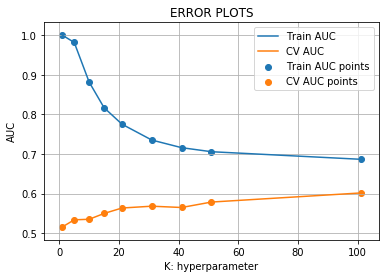

Wall time: 1h 45min 8s


In [126]:
%%time
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51, 101]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr, y_train)

    y_train_pred = batch_predict(neigh, X_tr)    
    y_cv_pred = batch_predict(neigh, X_cr)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

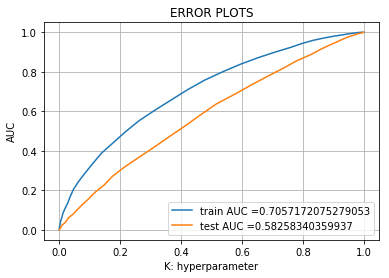

In [128]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

best_k = 51
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr)    
y_test_pred = batch_predict(neigh, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [129]:
#function to get heatmap confusion matrix
def get_confusion_matrix(clf,X_te,y_test):
    y_pred = clf.predict(X_te)
    df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
    df_cm.columns = ['Predicted NO','Predicted YES']
    df_cm = df_cm.rename({0: 'Actual NO', 1: 'Actual YES'})
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

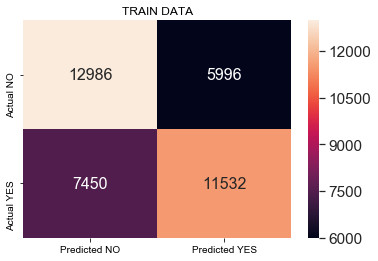

In [130]:
import matplotlib.pyplot as plt

plt.title('TRAIN DATA')
get_confusion_matrix(neigh,X_tr,y_train)

Wall time: 3min 46s


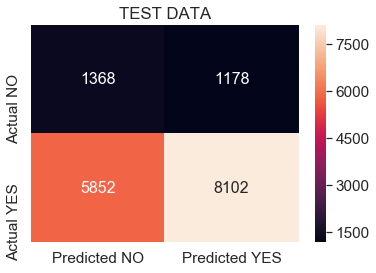

In [132]:
%%time
import matplotlib.pyplot as plt

plt.title('TEST DATA')
get_confusion_matrix(neigh,X_te,y_test)

### 2.4.2 Applying KNN brute force on TFIDF,<font color='red'> SET 2</font>

In [136]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2

#Selecting top 2000 best features from the generated tfidf features
selector = SelectKBest(chi2, k = 2000 )
selector.fit(X_train_essay_tfidf,y_train)

X_train_essay_2000 = selector.transform(X_train_essay_tfidf)
X_cv_essay_2000 = selector.transform(X_cv_essay_tfidf)
X_test_essay_2000 = selector.transform(X_test_essay_tfidf)

print(X_train_essay_2000.shape)
print(X_cv_essay_2000.shape)
print(X_test_essay_2000.shape)

(37964, 2000)
(11055, 2000)
(16500, 2000)


<h2> Feature selection with `SelectKBest` </h2>

In [137]:
#Selecting top 2000 best features from the generated tfidf features
selector = SelectKBest(chi2, k = 2000 )
selector.fit(X_train_title_tfidf,y_train)

X_train_title_2000 = selector.transform(X_train_title_tfidf)
X_cv_title_2000 = selector.transform(X_cv_title_tfidf)
X_test_title_2000 = selector.transform(X_test_title_tfidf)

print(X_train_title_2000.shape)
print(X_cv_title_2000.shape)
print(X_test_title_2000.shape)

(37964, 2000)
(11055, 2000)
(16500, 2000)


In [141]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_2000,X_train_title_2000,X_train_cat,X_train_subcat, X_train_state, X_train_prefix, X_train_grade, X_train_price_std,X_train_projects_std)).tocsr()
X_cr = hstack((X_cv_essay_2000,X_cv_title_2000,X_cv_cat,X_cv_subcat, X_cv_state, X_cv_prefix, X_cv_grade, X_cv_price_std,X_cv_projects_std)).tocsr()
X_te = hstack((X_test_essay_2000,X_test_title_2000,X_test_cat,X_test_subcat, X_test_state, X_test_prefix, X_test_grade, X_test_price_std,X_test_projects_std)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(37964, 4101) (37964,)
(11055, 4101) (11055,)
(16500, 4101) (16500,)


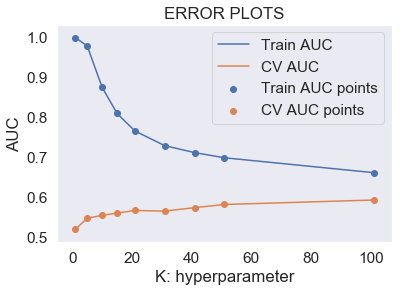

Wall time: 1h 21min 28s


In [142]:
%%time
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51, 101]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr, y_train)

    y_train_pred = batch_predict(neigh, X_tr)    
    y_cv_pred = batch_predict(neigh, X_cr)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

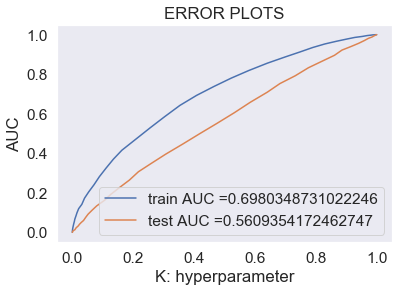

In [143]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

best_k = 51
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr)    
y_test_pred = batch_predict(neigh, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

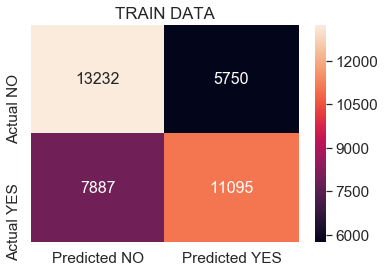

In [144]:
plt.title('TRAIN DATA')
get_confusion_matrix(neigh,X_tr,y_train)

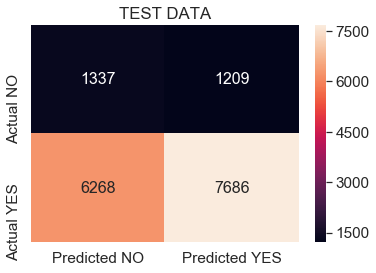

In [145]:
plt.title('TEST DATA')
get_confusion_matrix(neigh,X_te,y_test)

### 2.4.3 Applying KNN brute force on AVG W2V,<font color='red'> SET 3</font>

In [146]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((train_avg_w2v_vectors,train_avg_w2v_vectors_title,X_train_cat,X_train_subcat, X_train_state, X_train_prefix, X_train_grade, X_train_price_std,X_train_projects_std)).tocsr()
X_cr = hstack((cv_avg_w2v_vectors,cv_avg_w2v_vectors_title,X_cv_cat,X_cv_subcat, X_cv_state, X_cv_prefix, X_cv_grade, X_cv_price_std,X_cv_projects_std)).tocsr()
X_te = hstack((test_avg_w2v_vectors,test_avg_w2v_vectors_title,X_test_cat,X_test_subcat, X_test_state, X_test_prefix, X_test_grade, X_test_price_std,X_test_projects_std)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(37964, 701) (37964,)
(11055, 701) (11055,)
(16500, 701) (16500,)



100%|████████████████████████████████████████████████████████████████████████████████| 9/9 [4:02:36<00:00, 1620.01s/it]

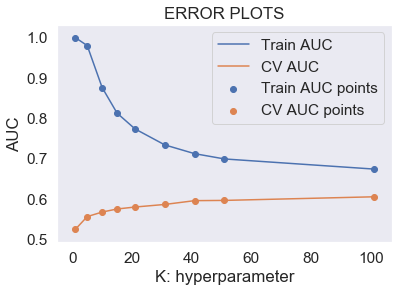

In [156]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51, 101]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr, y_train)

    y_train_pred = batch_predict(neigh, X_tr)    
    y_cv_pred = batch_predict(neigh, X_cr)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

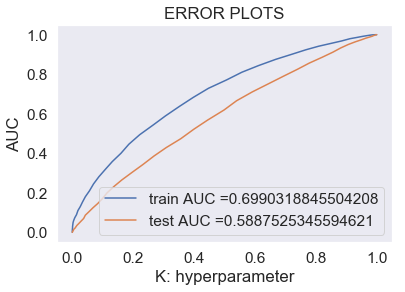

In [157]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

best_k = 51
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr)    
y_test_pred = batch_predict(neigh, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

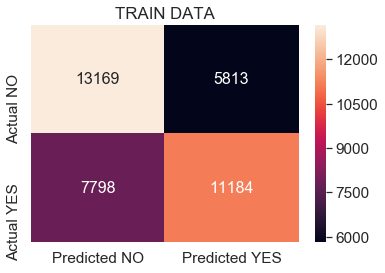

In [158]:
plt.title('TRAIN DATA')
get_confusion_matrix(neigh,X_tr,y_train)

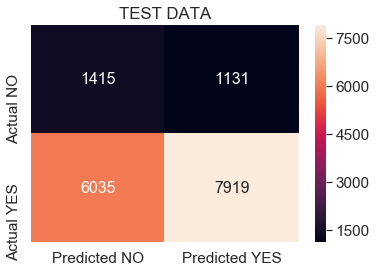

In [159]:
plt.title('TEST DATA')
get_confusion_matrix(neigh,X_te,y_test)

### 2.4.4 Applying KNN brute force on TFIDF W2V,<font color='red'> SET 4</font>

In [151]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((train_tfidf_w2v_vectors,train_tfidf_w2v_vectors_title,X_train_cat,X_train_subcat, X_train_state, X_train_prefix, X_train_grade, X_train_price_std,X_train_projects_std)).tocsr()
X_cr = hstack((cv_tfidf_w2v_vectors,cv_tfidf_w2v_vectors_title,X_cv_cat,X_cv_subcat, X_cv_state, X_cv_prefix, X_cv_grade, X_cv_price_std,X_cv_projects_std)).tocsr()
X_te = hstack((test_tfidf_w2v_vectors,test_tfidf_w2v_vectors_title,X_test_cat,X_test_subcat, X_test_state, X_test_prefix, X_test_grade, X_test_price_std,X_test_projects_std)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(37964, 201) (37964,)
(11055, 201) (11055,)
(16500, 201) (16500,)



100%|████████████████████████████████████████████████████████████████████████████████| 9/9 [4:03:24<00:00, 1628.55s/it]

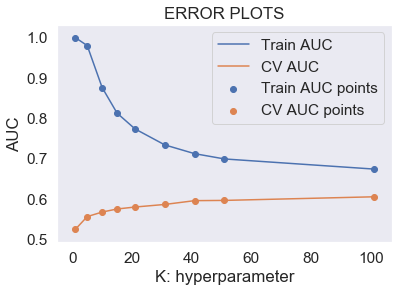

In [152]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51, 101]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr, y_train)

    y_train_pred = batch_predict(neigh, X_tr)    
    y_cv_pred = batch_predict(neigh, X_cr)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

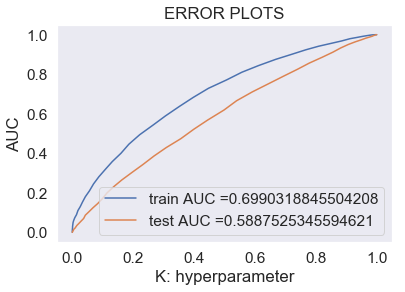

Wall time: 30min 42s


In [153]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

best_k = 51
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr)    
y_test_pred = batch_predict(neigh, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

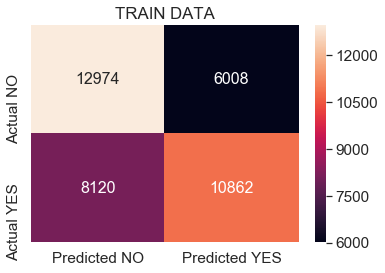

In [154]:
plt.title('TRAIN DATA') 
get_confusion_matrix(neigh,X_tr,y_train)

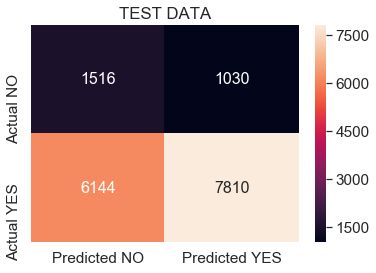

In [155]:
plt.title('TEST DATA')
get_confusion_matrix(neigh,X_te,y_test)

<h1>3. Conclusions</h1>

In [163]:
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Vectorizer","Model", "Hyperparameter", "AUC"]
x.add_row(["Bag of Words","Brute", 51, 0.58])
x.add_row(["TFIDF","Brute", 51, 0.56])
x.add_row(["AVG W2V","Brute", 51, 0.59])
x.add_row(["TFIDF W2V","Brute", 51, 0.59])

print(x)

+--------------+-------+----------------+------+
|  Vectorizer  | Model | Hyperparameter | AUC  |
+--------------+-------+----------------+------+
| Bag of Words | Brute |       51       | 0.58 |
|    TFIDF     | Brute |       51       | 0.56 |
|   AVG W2V    | Brute |       51       | 0.59 |
|  TFIDF W2V   | Brute |       51       | 0.59 |
+--------------+-------+----------------+------+
